In [2]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils import area_weighting
from isca_tools.plot import plot_spin_up
from isca_tools.utils.radiation import frierson_net_toa_sw_dwn

In [5]:
# Load dataset
exp_dir = f'rossbypalooza/depth=20/all_nh/lat_10/no_wishe/socrates/'
exp_name = f'evap=0'
ds = isca_tools.load_dataset(exp_dir+exp_name)
namelist = isca_tools.load_namelist(exp_dir+exp_name)  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']

In [21]:
n_years = int(namelist['experiment_details']['n_months_total']/12)
n_year_days = 360
ds_annual_mean = xr.concat([ds.sel(time=slice(i*n_year_days, (i+1)*n_year_days)).mean(dim='time', keepdims=True) for i in range(n_years)], dim='time')
# short_wave_net = frierson_net_toa_sw_dwn(ds_annual_mean.swdn_toa, ds_annual_mean.ps, albedo, tau_sw)

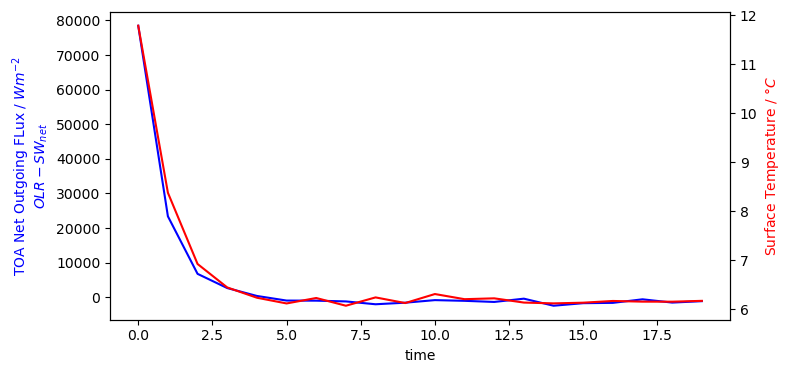

In [22]:
# Plot spinup time for each depth value
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.set_xlabel('time [years]')
plot_spin_up(ds_annual_mean.soc_olr, ds_annual_mean.soc_toa_sw, ds_annual_mean.t_surf, ax)
# ax.set_xlim(0, n_years-1)

## Ozone Sanity Check
Sanity check that ozone concentration is same at all coordinates, and at all times

In [22]:
ds_ozone = isca_tools.load_dataset(exp_dir+'base')['soc_ozone'].load()

/Users/joshduffield/Documents/StAndrews/Isca/isca_tools/utils/load.py:57: UserWarning: First month saved is 181 not 1.
  warnings.warn(f'First month saved is {first_month} not 1.')


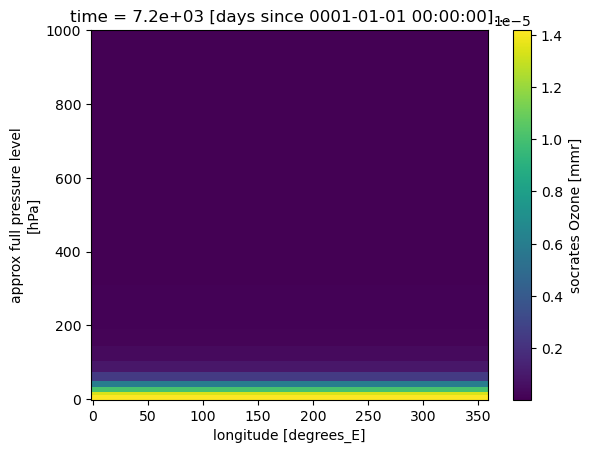

In [23]:
ds_ozone.isel(time=-1, lat=0).plot()

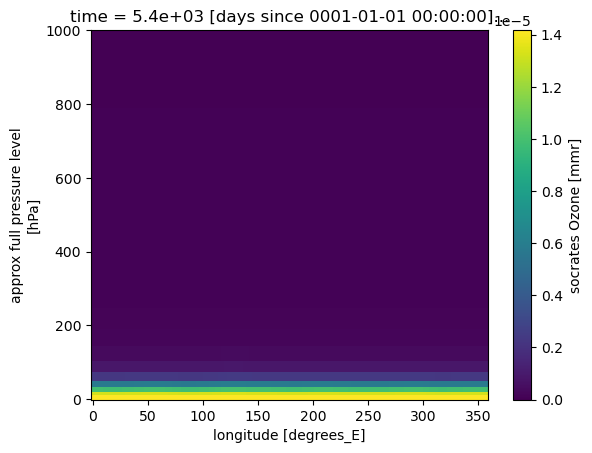

In [24]:
ds_ozone.isel(time=0, lat=20).plot()

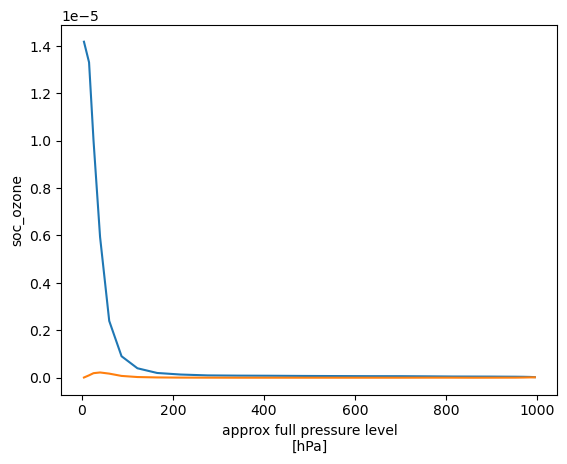

In [25]:
ds_ozone.mean(dim=['lat', 'lon', 'time']).plot()
ds_ozone.std(dim=['lat', 'lon', 'time']).plot()